# Deer Population Experiments


In [1]:
%load_ext autoreload
%autoreload 2

from src.main_emp import runSimulation, HuntingParameters, ModelParameters
from src.main_emp import generateInitialPopulation

## Set up parameter options


In [2]:
# Define yearly cull data
culling_data = {
    2005: {"calves": 160, "hinds": 570, "stags": 420},
    2006: {"calves": 200, "hinds": 500, "stags": 520},
    2007: {"calves": 260, "hinds": 580, "stags": 450},
    2008: {"calves": 210, "hinds": 550, "stags": 450},
    2009: {"calves": 260, "hinds": 490, "stags": 430},
    2010: {"calves": 270, "hinds": 510, "stags": 520},
    2011: {"calves": 160, "hinds": 490, "stags": 550},
    2012: {"calves": 290, "hinds": 600, "stags": 590},
    2013: {"calves": 290, "hinds": 650, "stags": 610},
    2014: {"calves": 290, "hinds": 620, "stags": 500},
    2015: {"calves": 220, "hinds": 590, "stags": 510},
    2016: {"calves": 290, "hinds": 610, "stags": 490},
    2017: {"calves": 400, "hinds": 830, "stags": 600},
    2018: {"calves": 200, "hinds": 520, "stags": 580},
}

# Instantiate HuntingParameters with yearly cull data
harvestEqual = HuntingParameters(culling_data=culling_data)

In [3]:
actual_counts = {
    2005: 10200,
    2008: 9000,
    2011: 9000,
    2014: 8000,
    2015: 9900,
    2018: 8500,
}

In [4]:
defaultParameters = ModelParameters(
    maxCapacityImpact=0.1,
    capacityCurveSlope=1,
    initialIndividuals=10200,
    maximumIndividuals=15300,
    huntingLimit=102000,
    probYoungReproduce=0.1,  # 0.1
    probMatureReproduce=0.9,  # 0.5
)

In [ ]:
population_df = runSimulation(
    defaultParameters, harvestEqual, samples=100, end_year=2018
)

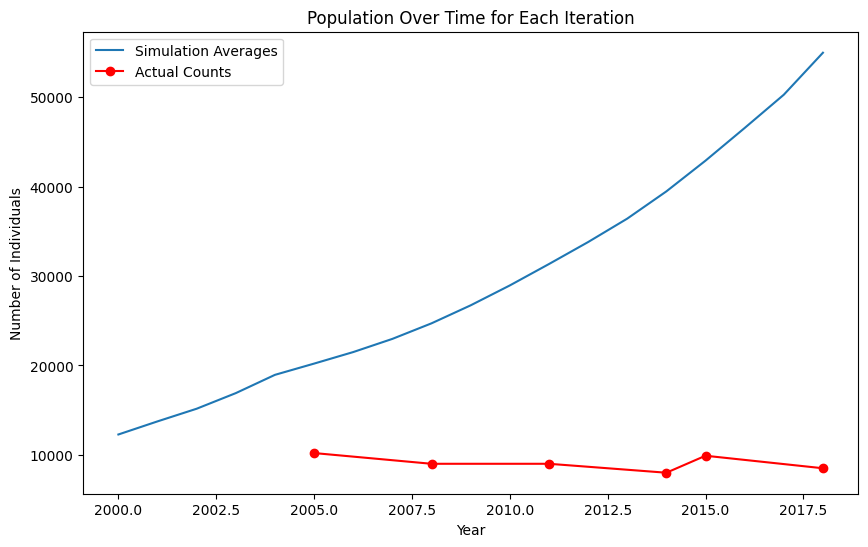

In [6]:
import matplotlib.pyplot as plt

# Plot the population over time for each iteration
plt.figure(figsize=(10, 6))

average_population = population_df.groupby("year")["num_individuals"].mean()

plt.plot(
    average_population.index, average_population.values, label="Simulation Averages"
)

# Plot the actual counts
actual_years = list(actual_counts.keys())
actual_values = list(actual_counts.values())

plt.plot(actual_years, actual_values, label="Actual Counts", color="red", marker="o")
plt.legend()


plt.xlabel("Year")
plt.ylabel("Number of Individuals")
plt.title("Population Over Time for Each Iteration")
plt.show()

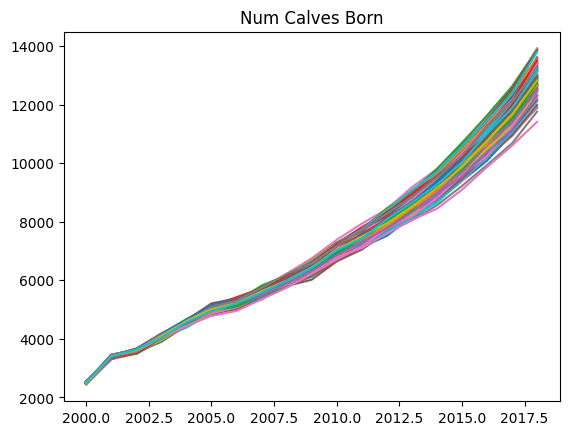

In [7]:
for iteration, group in population_df.groupby("iteration"):
    plt.plot(group["year"], group["num_calves"])

plt.title("Num Calves Born")
plt.show()

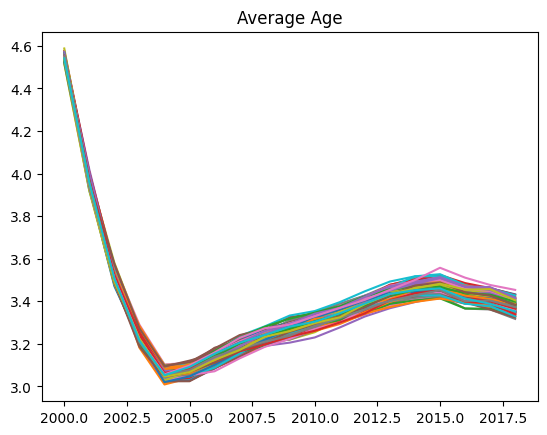

In [8]:
for iteration, group in population_df.groupby("iteration"):
    plt.plot(group["year"], group["avg_age"])

plt.title("Average Age")
plt.show()

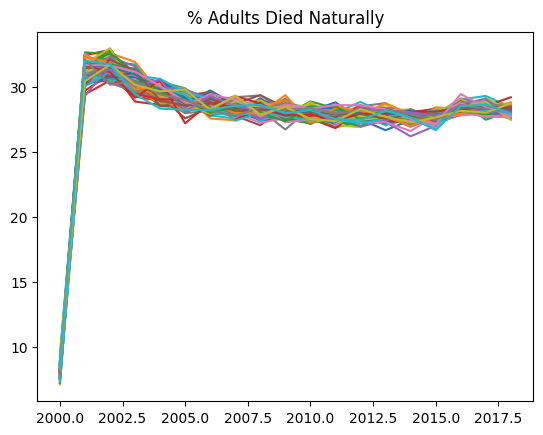

In [9]:
for iteration, group in population_df.groupby("iteration"):
    plt.plot(
        group["year"], group["stags_died_percentage"] + group["hinds_died_percentage"]
    )

plt.title("% Adults Died Naturally")
plt.show()

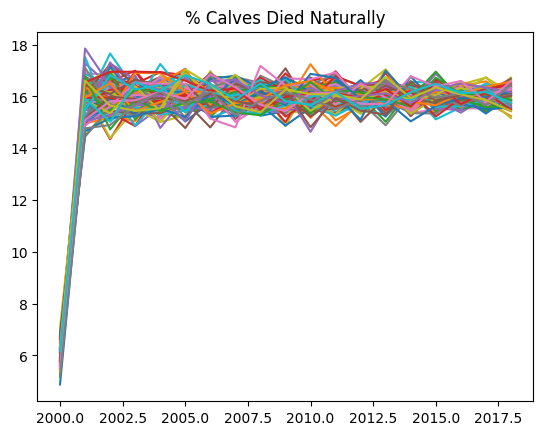

In [10]:
for iteration, group in population_df.groupby("iteration"):
    plt.plot(group["year"], group["calves_died_percentage"])

plt.title("% Calves Died Naturally")
plt.show()